In [ ]:
#Critical libraries
import plotly.express as px
import pandas as pd
import numpy as np
import geopandas as gpd
from datetime import datetime, timedelta

# Load Data
df1 = pd.read_csv('/content/F2.cleanedClientsRaw Data Dimension_CMPT3835.csv')
df = pd.read_csv('/content/FAuto.cleanedFood Hampers Fact_CMPT3835.csv')

In [ ]:
df.head()

,client_list,collect_scheduled_date,quantity,datetime_from,datetime_to,hamper_type,pickup_date,pickup_location,related_scheduler,unique_client,...,is_weekend,collect_scheduled_year,collect_scheduled_month,time_to_collection,is_peak_season,continuous_month,month_of_year,quantity_weekly,quantity_daily,quantity_monthly
0,0.008973,2023-07-27 0:00,327,2023-07-27 0:00,2023-07-27 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,0,2023,7,179,1,7,7,327,2497,3
1,0.008973,2023-08-26 0:00,263,2023-08-26 0:00,2023-08-26 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,1,2023,8,149,1,8,8,263,2187,7
2,0.008973,2023-09-25 0:00,308,2023-09-25 0:00,2023-09-25 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,0,2023,9,119,0,9,9,308,2834,20
3,0.008973,2023-10-25 0:00,330,2023-10-25 0:00,2023-10-25 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,0,2023,10,89,0,10,10,330,2249,34
4,0.008973,2023-11-24 0:00,392,2023-11-24 0:00,2023-11-24 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,0,2023,11,59,0,11,11,392,2364,592


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_list              16605 non-null  float64
 1   collect_scheduled_date   16605 non-null  object 
 2   quantity                 16605 non-null  int64  
 3   datetime_from            16605 non-null  object 
 4   datetime_to              16605 non-null  object 
 5   hamper_type              16605 non-null  float64
 6   pickup_date              16605 non-null  object 
 7   pickup_location          16605 non-null  int64  
 8   related_scheduler        16605 non-null  float64
 9   unique_client            16605 non-null  object 
 10  Creation Date            16605 non-null  object 
 11  Modified Date            16605 non-null  object 
 12  Creator                  16605 non-null  float64
 13  unique id                16605 non-null  object 
 14  week_of_year          

In [ ]:
df1.head()

,address,age,birthdates,date_reopened,dependents_qty,family,household,organization_x,podio_created_on,primary_client_key,...,status,urgent_goal,Creation Date,Modified Date_x,Creator_x,unique id,postal_code,latitude,longitude,distance_to_center
0,5653,22.0,1970-01-01 00:00:00,2022-09-24 19:07:00,1.0,15,2,0,2864.0,724.0,...,0,0,2022-09-23 19:07:00,2024-08-22 11:56:00,2,1663970867191x215057012520910850,T5G 3J5,53.5705,-113.5051,2.816993
1,5653,22.0,1970-01-01 00:00:00,2022-09-24 19:09:00,1.0,12,2,0,2864.0,724.0,...,0,0,2022-09-23 19:09:00,2024-08-22 11:50:00,2,1663970977536x320239406776320000,T5G 3J5,53.5705,-113.5051,2.816993
2,1298,22.0,1970-01-01 00:00:00,2022-11-02 15:27:00,1.0,17,2,0,2864.0,724.0,...,0,0,2022-11-01 15:27:00,2024-08-22 12:36:00,2,1667327243288x887165737992192000,T5G 3J5,53.5705,-113.5051,2.816993
3,3036,22.0,1970-01-01 00:00:00,2022-11-08 12:12:00,1.0,19,2,0,2864.0,724.0,...,0,0,2022-11-07 12:12:00,2024-08-22 11:58:00,5,1667833948363x769349711194751000,T5Z 0G5,53.6365,-113.4673,10.213153
4,5653,22.0,1970-01-01 00:00:00,2023-10-04 17:20:00,1.0,22,2,0,2864.0,724.0,...,0,0,2022-11-07 12:17:00,2024-08-22 12:04:00,5,1667834247644x935054501347328000,T5Z 0G5,53.6365,-113.4673,10.213153


In [ ]:
import pandas as pd

df = pd.read_csv('/content/FAuto.cleanedFood Hampers Fact_CMPT3835.csv')
df.head()

,client_list,collect_scheduled_date,quantity,datetime_from,datetime_to,hamper_type,pickup_date,pickup_location,related_scheduler,unique_client,...,is_weekend,collect_scheduled_year,collect_scheduled_month,time_to_collection,is_peak_season,continuous_month,month_of_year,quantity_weekly,quantity_daily,quantity_monthly
0,0.008973,2023-07-27 0:00,327,2023-07-27 0:00,2023-07-27 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,0,2023,7,179,1,7,7,327,2497,3
1,0.008973,2023-08-26 0:00,263,2023-08-26 0:00,2023-08-26 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,1,2023,8,149,1,8,8,263,2187,7
2,0.008973,2023-09-25 0:00,308,2023-09-25 0:00,2023-09-25 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,0,2023,9,119,0,9,9,308,2834,20
3,0.008973,2023-10-25 0:00,330,2023-10-25 0:00,2023-10-25 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,0,2023,10,89,0,10,10,330,2249,34
4,0.008973,2023-11-24 0:00,392,2023-11-24 0:00,2023-11-24 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,0,2023,11,59,0,11,11,392,2364,592


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/FAuto.cleanedFood Hampers Fact_CMPT3835.csv')  # Assuming the file exists

# Rename the column
df = df.rename(columns={'collect_scheduled_date': 'timestamp'})

# Convert 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Define the target column (ensure it exists)
target_column = 'quantity'
df

,client_list,timestamp,quantity,datetime_from,datetime_to,hamper_type,pickup_date,pickup_location,related_scheduler,unique_client,...,is_weekend,collect_scheduled_year,collect_scheduled_month,time_to_collection,is_peak_season,continuous_month,month_of_year,quantity_weekly,quantity_daily,quantity_monthly
0,0.008973,2023-07-27 00:00:00,327,2023-07-27 0:00,2023-07-27 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,0,2023,7,179,1,7,7,327,2497,3
1,0.008973,2023-08-26 00:00:00,263,2023-08-26 0:00,2023-08-26 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,1,2023,8,149,1,8,8,263,2187,7
2,0.008973,2023-09-25 00:00:00,308,2023-09-25 0:00,2023-09-25 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,0,2023,9,119,0,9,9,308,2834,20
3,0.008973,2023-10-25 00:00:00,330,2023-10-25 0:00,2023-10-25 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,0,2023,10,89,0,10,10,330,2249,34
4,0.008973,2023-11-24 00:00:00,392,2023-11-24 0:00,2023-11-24 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,0,2023,11,59,0,11,11,392,2364,592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,0.000361,2024-10-26 03:00:00,330,2024-10-26 3:00,2024-10-26 3:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,1,2024,10,-64,0,22,22,330,2187,1263
16601,0.000361,2024-11-26 04:00:00,470,2024-11-26 4:00,2024-11-26 4:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,0,2024,11,-95,0,23,23,470,2438,1225
16602,0.000361,2024-12-26 04:00:00,363,2024-12-26 4:00,2024-12-26 4:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,0,2024,12,-125,0,24,24,363,2497,1001
16603,0.000361,2025-01-26 04:00:00,311,2025-01-26 4:00,2025-01-26 4:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,1,2025,1,-156,0,25,25,311,2038,707


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from datetime import datetime



In [ ]:
import pandas as pd

df['timestamp'] = pd.to_datetime(df['timestamp'])
#create a weekly time index
df['weekly_index'] = df['timestamp'].dt.to_period('W')

#3. Calculate weekly total quantity:
weekly_quantity = df.groupby('weekly_index')['quantity'].sum()
print(weekly_quantity)

#4. Add weekly quantity to the original dataframe:
df = df.merge(weekly_quantity, left_on='weekly_index', right_index=True, how='left')
df.rename(columns={'quantity_y': 'weekly_quantity', 'quantity_x': 'quantity'}, inplace=True)
df = df.loc[:,~df.columns.duplicated()]
df.tail()

weekly_index
2023-07-24/2023-07-30     654
2023-07-31/2023-08-06     398
2023-08-21/2023-08-27    1052
2023-08-28/2023-09-03     260
2023-09-04/2023-09-10     445
                         ... 
2025-07-28/2025-08-03     796
2025-08-04/2025-08-10    2010
2025-08-11/2025-08-17    1170
2025-08-18/2025-08-24     263
2025-09-01/2025-09-07     445
Freq: W-SUN, Name: quantity, Length: 108, dtype: int64


,client_list,timestamp,quantity,datetime_from,datetime_to,hamper_type,pickup_date,pickup_location,related_scheduler,unique_client,...,collect_scheduled_month,time_to_collection,is_peak_season,continuous_month,month_of_year,quantity_weekly,quantity_daily,quantity_monthly,weekly_index,weekly_quantity
16600,0.000361,2024-10-26 03:00:00,330,2024-10-26 3:00,2024-10-26 3:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,10,-64,0,22,22,330,2187,1263,2024-10-21/2024-10-27,102300
16601,0.000361,2024-11-26 04:00:00,470,2024-11-26 4:00,2024-11-26 4:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,11,-95,0,23,23,470,2438,1225,2024-11-25/2024-12-01,125490
16602,0.000361,2024-12-26 04:00:00,363,2024-12-26 4:00,2024-12-26 4:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,12,-125,0,24,24,363,2497,1001,2024-12-23/2024-12-29,78408
16603,0.000361,2025-01-26 04:00:00,311,2025-01-26 4:00,2025-01-26 4:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,1,-156,0,25,25,311,2038,707,2025-01-20/2025-01-26,44162
16604,0.000361,2024-08-26 14:36:00,260,2024-08-26 14:36,2024-08-26 14:36,0.999036,2024-08-26 14:36,1,0.000060,1709066244591x646971172426088400,...,8,0,1,20,20,260,2834,1298,2024-08-26/2024-09-01,67340


In [ ]:
import pandas as pd

df['timestamp'] = pd.to_datetime(df['timestamp'])
#create a weekly time index
df['weekly_index'] = df['timestamp'].dt.to_period('W')

#3. Calculate weekly total quantity:
weekly_quantity = df.groupby('weekly_index')['quantity'].sum()
print(weekly_quantity)

#4. Add weekly quantity to the original dataframe:
df = df.merge(weekly_quantity, left_on='weekly_index', right_index=True, how='left')
df.rename(columns={'quantity_y': 'weekly_quantity', 'quantity_x': 'quantity'}, inplace=True)
df = df.loc[:,~df.columns.duplicated()]
df.tail()

weekly_index
2023-07-24/2023-07-30     654
2023-07-31/2023-08-06     398
2023-08-21/2023-08-27    1052
2023-08-28/2023-09-03     260
2023-09-04/2023-09-10     445
                         ... 
2025-07-28/2025-08-03     796
2025-08-04/2025-08-10    2010
2025-08-11/2025-08-17    1170
2025-08-18/2025-08-24     263
2025-09-01/2025-09-07     445
Freq: W-SUN, Name: quantity, Length: 108, dtype: int64


,client_list,timestamp,quantity,datetime_from,datetime_to,hamper_type,pickup_date,pickup_location,related_scheduler,unique_client,...,collect_scheduled_month,time_to_collection,is_peak_season,continuous_month,month_of_year,quantity_weekly,quantity_daily,quantity_monthly,weekly_index,weekly_quantity
16600,0.000361,2024-10-26 03:00:00,330,2024-10-26 3:00,2024-10-26 3:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,10,-64,0,22,22,330,2187,1263,2024-10-21/2024-10-27,102300
16601,0.000361,2024-11-26 04:00:00,470,2024-11-26 4:00,2024-11-26 4:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,11,-95,0,23,23,470,2438,1225,2024-11-25/2024-12-01,125490
16602,0.000361,2024-12-26 04:00:00,363,2024-12-26 4:00,2024-12-26 4:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,12,-125,0,24,24,363,2497,1001,2024-12-23/2024-12-29,78408
16603,0.000361,2025-01-26 04:00:00,311,2025-01-26 4:00,2025-01-26 4:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,1,-156,0,25,25,311,2038,707,2025-01-20/2025-01-26,44162
16604,0.000361,2024-08-26 14:36:00,260,2024-08-26 14:36,2024-08-26 14:36,0.999036,2024-08-26 14:36,1,0.000060,1709066244591x646971172426088400,...,8,0,1,20,20,260,2834,1298,2024-08-26/2024-09-01,67340


In [ ]:
import pandas as pd

# data
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract relevant date features

df['day_of_week'] = df['timestamp'].dt.dayofweek
df['week_of_year'] = df['timestamp'].dt.isocalendar().week
df['month_of_year'] = (df['timestamp'].dt.year - df['timestamp'].dt.year.min()) * 12 + df['timestamp'].dt.month

# Calculate and store weekly quantity

#weekly_frequency = df.groupby('week_of_year')['quantity'].sum()
#df['quantity_weekly'] = df['week_of_year'].map(weekly_frequency)

# Calculate and store daily quantity

#daily_frequency = df.groupby('day_of_week')['quantity'].sum()
#df['quantity_daily'] = df['day_of_week'].map(daily_frequency)

# Calculate and store monthly quantity

#monthly_frequency = df.groupby('month_of_year')['quantity'].sum()
#df['quantity_monthly'] = df['month_of_year'].map(monthly_frequency)
#df['quantity'] = df['quantity_weekly']  # Or df['quantity_daily'] or df['quantity_monthly']
df2 = df.copy()

In [ ]:
df2

,client_list,timestamp,quantity,datetime_from,datetime_to,hamper_type,pickup_date,pickup_location,related_scheduler,unique_client,...,collect_scheduled_month,time_to_collection,is_peak_season,continuous_month,month_of_year,quantity_weekly,quantity_daily,quantity_monthly,weekly_index,weekly_quantity
0,0.008973,2023-07-27 00:00:00,327,2023-07-27 0:00,2023-07-27 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,7,179,1,7,7,327,2497,3,2023-07-24/2023-07-30,654
1,0.008973,2023-08-26 00:00:00,263,2023-08-26 0:00,2023-08-26 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,8,149,1,8,8,263,2187,7,2023-08-21/2023-08-27,1052
2,0.008973,2023-09-25 00:00:00,308,2023-09-25 0:00,2023-09-25 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,9,119,0,9,9,308,2834,20,2023-09-25/2023-10-01,3080
3,0.008973,2023-10-25 00:00:00,330,2023-10-25 0:00,2023-10-25 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,10,89,0,10,10,330,2249,34,2023-10-23/2023-10-29,6600
4,0.008973,2023-11-24 00:00:00,392,2023-11-24 0:00,2023-11-24 0:00,0.999036,2024-01-22 17:01,1,0.000422,1696013590859x172792487259963780,...,11,59,0,11,11,392,2364,592,2023-11-20/2023-11-26,54488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,0.000361,2024-10-26 03:00:00,330,2024-10-26 3:00,2024-10-26 3:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,10,-64,0,22,22,330,2187,1263,2024-10-21/2024-10-27,102300
16601,0.000361,2024-11-26 04:00:00,470,2024-11-26 4:00,2024-11-26 4:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,11,-95,0,23,23,470,2438,1225,2024-11-25/2024-12-01,125490
16602,0.000361,2024-12-26 04:00:00,363,2024-12-26 4:00,2024-12-26 4:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,12,-125,0,24,24,363,2497,1001,2024-12-23/2024-12-29,78408
16603,0.000361,2025-01-26 04:00:00,311,2025-01-26 4:00,2025-01-26 4:00,0.999036,2024-08-23 13:22,1,0.000361,1724441761751x379664611190243300,...,1,-156,0,25,25,311,2038,707,2025-01-20/2025-01-26,44162


In [ ]:
#df2.to_csv('FAuto.cleanedFood Hampers Fact_CMPT3835.csv', index=False)

In [ ]:
df.isna().sum()

,0
client_list,0
timestamp,0
quantity,0
datetime_from,0
datetime_to,0
hamper_type,0
pickup_date,0
pickup_location,0
related_scheduler,0
unique_client,0


In [ ]:
# Define the target column (ensure it exists)
# target_column = 'total demand'  # Original line
target_column = 'quantity'

if target_column in df.columns:
    df['target'] = df[target_column]  # Create a 'target' column
else:
    raise ValueError(f"Error: Column '{target_column}' not found in DataFrame.\nAvailable columns: {df.columns.tolist()}")

In [ ]:
# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Ensure correct ordering of time series data
# Changed  'item id' to 'client_list' or the correct column name
df = df.sort_values(by=['client_list', 'timestamp'])
df.head()

,client_list,timestamp,quantity,datetime_from,datetime_to,hamper_type,pickup_date,pickup_location,related_scheduler,unique_client,...,time_to_collection,is_peak_season,continuous_month,month_of_year,quantity_weekly,quantity_daily,quantity_monthly,weekly_index,weekly_quantity,target
5201,0.00006,2023-10-30 03:00:00,285,2023-10-30 3:00,2023-10-30 3:00,0.999036,2024-07-24 15:30,1,0.00006,1696014620753x380340421180224400,...,268,0,10,10,285,2834,34,2023-10-30/2023-11-05,5415,285
548,0.00006,2023-11-07 04:00:00,468,2023-11-07 4:00,2023-11-07 4:00,0.999036,2023-11-07 19:34,1,0.00006,1696013581523x791163855072454900,...,0,0,11,11,468,2438,592,2023-11-06/2023-11-12,56628,468
1522,0.00006,2023-11-20 04:00:00,392,2023-11-20 4:00,2023-11-20 4:00,0.999036,2023-11-20 19:26,1,0.00006,1696013585616x968202076139878100,...,0,0,11,11,392,2834,592,2023-11-20/2023-11-26,54488,392
2165,0.00006,2023-11-27 04:00:00,470,2023-11-27 4:00,2023-11-27 4:00,0.999036,2023-11-27 15:40,1,0.00006,1696014624171x966078736281286400,...,0,0,11,11,470,2834,592,2023-11-27/2023-12-03,95410,470
3068,0.00006,2023-11-30 04:00:00,470,2023-11-30 4:00,2023-11-30 4:00,0.999036,2023-11-30 15:40,1,0.00006,1696018470713x631775875961032200,...,0,0,11,11,470,2497,592,2023-11-27/2023-12-03,95410,470


In [ ]:
# Convert date column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

#2. Create a monthly time index
df['time_index'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

# Group by the time index and sum the quantity
time_series = df.groupby('time_index')['quantity'].sum()

# Print the time series
print(time_series)


time_index
2023-07-01       654
2023-08-01      1710
2023-09-01      5612
2023-10-01     10460
2023-11-01    246851
2023-12-01    307017
2024-01-01    273732
2024-02-01    249379
2024-03-01    257915
2024-04-01    228301
2024-05-01    327102
2024-06-01    558002
2024-07-01    498958
2024-08-01    390506
2024-09-01    424470
2024-10-01    388894
2024-11-01    495566
2024-12-01    440463
2025-01-01    236132
2025-02-01    102909
2025-03-01     42821
2025-04-01     28469
2025-05-01     24823
2025-06-01     25036
2025-07-01     11537
2025-08-01      3841
2025-09-01       445
Name: quantity, dtype: int64


In [ ]:
df3 = time_series.copy()
#save to FAuto.cleanedFood Hampers Fact_CMPT3835.csv
#df.to_csv('FAuto.cleanedFood Hampers Fact_CMPT3835.csv', index=False)
df

,client_list,timestamp,quantity,datetime_from,datetime_to,hamper_type,pickup_date,pickup_location,related_scheduler,unique_client,...,is_peak_season,continuous_month,month_of_year,quantity_weekly,quantity_daily,quantity_monthly,weekly_index,weekly_quantity,target,time_index
5201,0.000060,2023-10-30 03:00:00,285,2023-10-30 3:00,2023-10-30 3:00,0.999036,2024-07-24 15:30,1,0.000060,1696014620753x380340421180224400,...,0,10,10,285,2834,34,2023-10-30/2023-11-05,5415,285,2023-10-01
548,0.000060,2023-11-07 04:00:00,468,2023-11-07 4:00,2023-11-07 4:00,0.999036,2023-11-07 19:34,1,0.000060,1696013581523x791163855072454900,...,0,11,11,468,2438,592,2023-11-06/2023-11-12,56628,468,2023-11-01
1522,0.000060,2023-11-20 04:00:00,392,2023-11-20 4:00,2023-11-20 4:00,0.999036,2023-11-20 19:26,1,0.000060,1696013585616x968202076139878100,...,0,11,11,392,2834,592,2023-11-20/2023-11-26,54488,392,2023-11-01
2165,0.000060,2023-11-27 04:00:00,470,2023-11-27 4:00,2023-11-27 4:00,0.999036,2023-11-27 15:40,1,0.000060,1696014624171x966078736281286400,...,0,11,11,470,2834,592,2023-11-27/2023-12-03,95410,470,2023-11-01
3068,0.000060,2023-11-30 04:00:00,470,2023-11-30 4:00,2023-11-30 4:00,0.999036,2023-11-30 15:40,1,0.000060,1696018470713x631775875961032200,...,0,11,11,470,2497,592,2023-11-27/2023-12-03,95410,470,2023-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15817,0.008973,2025-04-20 03:00:00,225,2025-04-20 3:00,2025-04-20 3:00,0.999036,2024-06-25 14:15,1,0.001566,1696013590859x172792487259963780,...,0,28,28,225,2038,117,2025-04-14/2025-04-20,5850,225,2025-04-01
13061,0.008973,2025-05-20 03:00:00,293,2025-05-20 3:00,2025-05-20 3:00,0.999036,2024-07-24 17:22,1,0.001566,1696013590859x172792487259963780,...,0,29,29,293,2438,87,2025-05-19/2025-05-25,7325,293,2025-05-01
15818,0.008973,2025-05-20 03:00:00,293,2025-05-20 3:00,2025-05-20 3:00,0.999036,2024-06-25 14:15,1,0.001566,1696013590859x172792487259963780,...,0,29,29,293,2438,87,2025-05-19/2025-05-25,7325,293,2025-05-01
13062,0.008973,2025-06-20 03:00:00,327,2025-06-20 3:00,2025-06-20 3:00,0.999036,2024-07-24 17:22,1,0.001566,1696013590859x172792487259963780,...,1,30,30,327,2364,67,2025-06-16/2025-06-22,5886,327,2025-06-01


In [ ]:
# Group by week and aggregate data to avoid duplicate indices

weekly_data = df.groupby(pd.Grouper(key='timestamp', freq='W'))['quantity'].sum().reset_index()

# 'collect_scheduled_date' as index for the weekly aggregated data

weekly_data = weekly_data.set_index('timestamp')

# Feature Engineering (Create Lagged Features)

weekly_data['lag_7'] = weekly_data['quantity'].shift(7)
weekly_data['lag_14'] = weekly_data['quantity'].shift(14)
weekly_data['lag_30'] = weekly_data['quantity'].shift(30)

In [ ]:
import pandas as pd

df['timestamp'] = pd.to_datetime(df['timestamp'])
#create a weekly time index
df['weekly_index'] = df['timestamp'].dt.to_period('W')

#3. Calculate weekly total quantity:
weekly_quantity = df.groupby('weekly_index')['quantity'].sum()
print(weekly_quantity)

#4. Add weekly quantity to the original dataframe:
df = df.merge(weekly_quantity, left_on='weekly_index', right_index=True, how='left')
df.rename(columns={'quantity_y': 'weekly_quantity', 'quantity_x': 'quantity'}, inplace=True)
df = df.loc[:,~df.columns.duplicated()]
df.tail()

weekly_index
2023-07-24/2023-07-30     654
2023-07-31/2023-08-06     398
2023-08-21/2023-08-27    1052
2023-08-28/2023-09-03     260
2023-09-04/2023-09-10     445
                         ... 
2025-07-28/2025-08-03     796
2025-08-04/2025-08-10    2010
2025-08-11/2025-08-17    1170
2025-08-18/2025-08-24     263
2025-09-01/2025-09-07     445
Freq: W-SUN, Name: quantity, Length: 108, dtype: int64


,client_list,timestamp,quantity,datetime_from,datetime_to,hamper_type,pickup_date,pickup_location,related_scheduler,unique_client,...,is_peak_season,continuous_month,month_of_year,quantity_weekly,quantity_daily,quantity_monthly,weekly_index,weekly_quantity,target,time_index
15817,0.008973,2025-04-20 03:00:00,225,2025-04-20 3:00,2025-04-20 3:00,0.999036,2024-06-25 14:15,1,0.001566,1696013590859x172792487259963780,...,0,28,28,225,2038,117,2025-04-14/2025-04-20,5850,225,2025-04-01
13061,0.008973,2025-05-20 03:00:00,293,2025-05-20 3:00,2025-05-20 3:00,0.999036,2024-07-24 17:22,1,0.001566,1696013590859x172792487259963780,...,0,29,29,293,2438,87,2025-05-19/2025-05-25,7325,293,2025-05-01
15818,0.008973,2025-05-20 03:00:00,293,2025-05-20 3:00,2025-05-20 3:00,0.999036,2024-06-25 14:15,1,0.001566,1696013590859x172792487259963780,...,0,29,29,293,2438,87,2025-05-19/2025-05-25,7325,293,2025-05-01
13062,0.008973,2025-06-20 03:00:00,327,2025-06-20 3:00,2025-06-20 3:00,0.999036,2024-07-24 17:22,1,0.001566,1696013590859x172792487259963780,...,1,30,30,327,2364,67,2025-06-16/2025-06-22,5886,327,2025-06-01
15807,0.008973,2025-06-20 03:00:00,327,2025-06-20 3:00,2025-06-20 3:00,0.999036,2024-06-03 17:15,1,0.001566,1696013590859x172792487259963780,...,1,30,30,327,2364,67,2025-06-16/2025-06-22,5886,327,2025-06-01


In [ ]:
# Convert date column to datetime format
#df = pd.read_csv('/content/FAuto.cleanedFood Hampers Fact_CMPT3835.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

#2. Create a monthly time index
df['time_index'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

# Group by the time index and sum the quantity
time_series = df.groupby('time_index')['quantity'].sum()

# Print the time series
print(time_series)

time_index
2023-07-01       654
2023-08-01      1710
2023-09-01      5612
2023-10-01     10460
2023-11-01    246851
2023-12-01    307017
2024-01-01    273732
2024-02-01    249379
2024-03-01    257915
2024-04-01    228301
2024-05-01    327102
2024-06-01    558002
2024-07-01    498958
2024-08-01    390506
2024-09-01    424470
2024-10-01    388894
2024-11-01    495566
2024-12-01    440463
2025-01-01    236132
2025-02-01    102909
2025-03-01     42821
2025-04-01     28469
2025-05-01     24823
2025-06-01     25036
2025-07-01     11537
2025-08-01      3841
2025-09-01       445
Name: quantity, dtype: int64


In [ ]:
#Date vs months
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

# Ensure time_series is defined:

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['time_index'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
time_series = df.groupby('time_index')['quantity'].sum()

# Now you can use time_series:
time_series_df = time_series.reset_index()  # Reset index to make 'time_index' a column
time_series_df = time_series_df.rename(columns={'time_index': 'Date'})  # Rename 'time_index' to 'Date'
time_series_df['Month'] = time_series_df['Date'].dt.month  # Create 'Month' column

In [ ]:
#Date vs months
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

# 'time_series_df'
time_series_df = time_series.reset_index()  # Reset index to make 'time_index' a column
time_series_df = time_series_df.rename(columns={'time_index': 'Date'})  # Rename 'time_index' to 'Date'
time_series_df['Month'] = time_series_df['Date'].dt.month  # Create 'Month' column
print(time_series_df)




         Date  quantity  Month
0  2023-07-01       654      7
1  2023-08-01      1710      8
2  2023-09-01      5612      9
3  2023-10-01     10460     10
4  2023-11-01    246851     11
5  2023-12-01    307017     12
6  2024-01-01    273732      1
7  2024-02-01    249379      2
8  2024-03-01    257915      3
9  2024-04-01    228301      4
10 2024-05-01    327102      5
11 2024-06-01    558002      6
12 2024-07-01    498958      7
13 2024-08-01    390506      8
14 2024-09-01    424470      9
15 2024-10-01    388894     10
16 2024-11-01    495566     11
17 2024-12-01    440463     12
18 2025-01-01    236132      1
19 2025-02-01    102909      2
20 2025-03-01     42821      3
21 2025-04-01     28469      4
22 2025-05-01     24823      5
23 2025-06-01     25036      6
24 2025-07-01     11537      7
25 2025-08-01      3841      8
26 2025-09-01       445      9


In [ ]:
time_series_df.isnull().sum()
#use ffill
time_series_df = time_series_df.fillna(method='ffill')
time_series_df.isnull().sum()

<ipython-input-339-3bc4829897dc>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_df = time_series_df.fillna(method='ffill')


,0
Date,0
quantity,0
Month,0


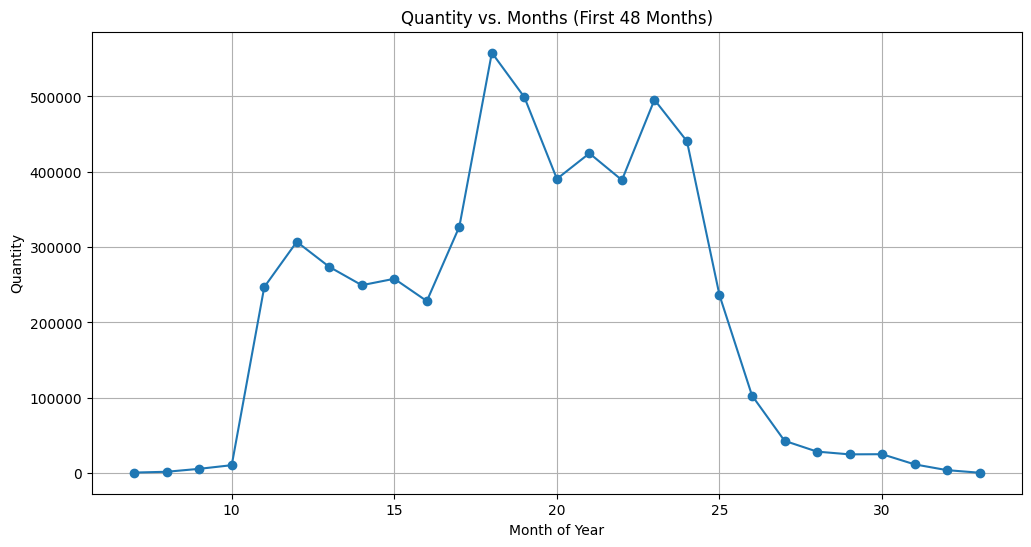

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert 'collect_scheduled_date' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Extract year and month
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

# 3. Create a continuous month index
df['month_of_year'] = (df['year'] - df['year'].min()) * 12 + df['month']

# 4. Filter for the first 48 months
filtered_df = df[df['month_of_year'] <= 48]

# 5. Group by continuous month and sum quantity
monthly_quantity = filtered_df.groupby('month_of_year')['quantity'].sum().reset_index()

# 6. Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_quantity['month_of_year'], monthly_quantity['quantity'], marker='o')
plt.title('Quantity vs. Months (First 48 Months)')
plt.xlabel('Month of Year')
plt.ylabel('Quantity')
plt.grid(True)

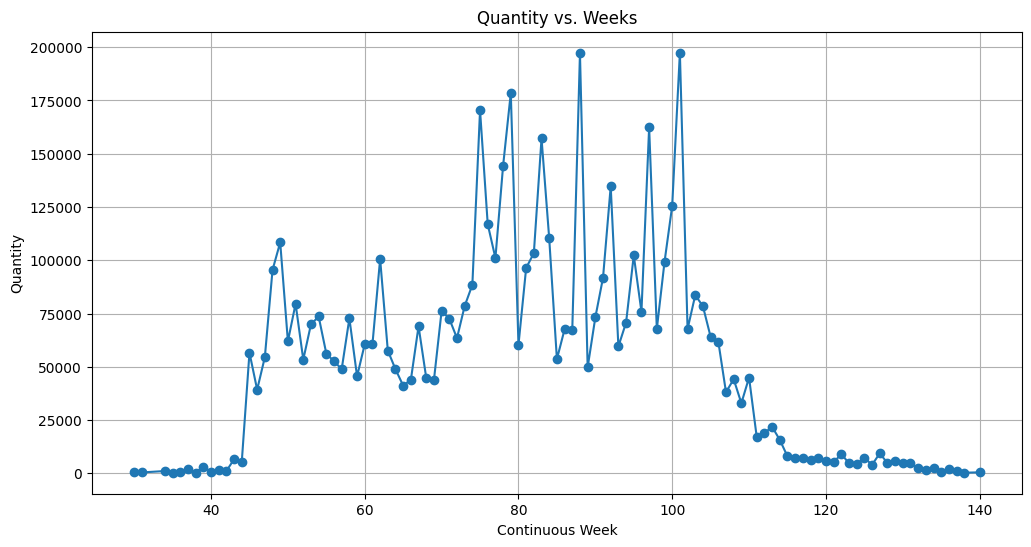

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert 'collect_scheduled_date' to datetime if not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Extract year and week
df['year'] = df['timestamp'].dt.year
df['week'] = df['timestamp'].dt.isocalendar().week

# 3. Create a continuous week index
df['continuous_week'] = (df['year'] - df['year'].min()) * 52 + df['week']

# 4. Group by continuous week and sum quantity
weekly_quantity = df.groupby('continuous_week')['quantity'].sum().reset_index()

# 5. Plot the data
plt.figure(figsize=(12, 6))
plt.plot(weekly_quantity['continuous_week'], weekly_quantity['quantity'], marker='o')
plt.title('Quantity vs. Weeks')
plt.xlabel('Continuous Week')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

In [ ]:
# Check for Skweness (skwed or unstablized)
print(df['quantity'].skew())

0.7303685935937727


In [ ]:
# Box-Cox Transformation
from scipy import stats  # Import the entire scipy.stats module

weekly_quantity['quantity_boxcox'], lambda_value = stats.boxcox(weekly_quantity['quantity'])

print(f"Optimal lambda value: {lambda_value}")

# Calculate skewness of the Box-Cox transformed data
skewness_boxcox = weekly_quantity['quantity_boxcox'].skew()
print(f"Skewness after Box-Cox transformation: {skewness_boxcox}")

Optimal lambda value: 0.32575033704562106
Skewness after Box-Cox transformation: -0.2781607020680989


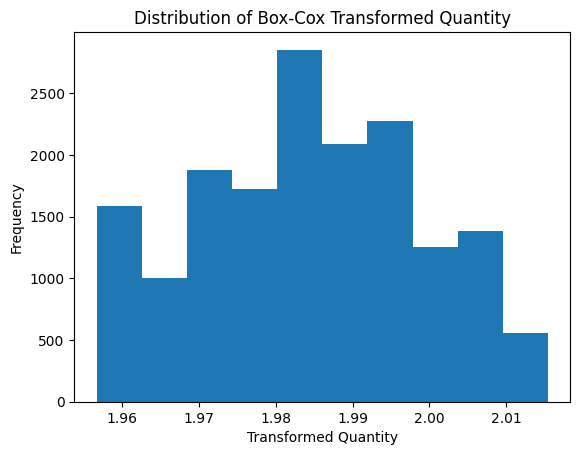

In [ ]:
# After Box-Cox transformation
from scipy.stats import boxcox
df['quantity_boxcox'], _ = boxcox(df['quantity'] + 1)
df['quantity_boxcox'].plot(kind='hist')
plt.title('Distribution of Box-Cox Transformed Quantity')
plt.xlabel('Transformed Quantity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Impute by using "ffill"
#time_series['quantity'] = time_series['quantity'].fillna(method='ffill')

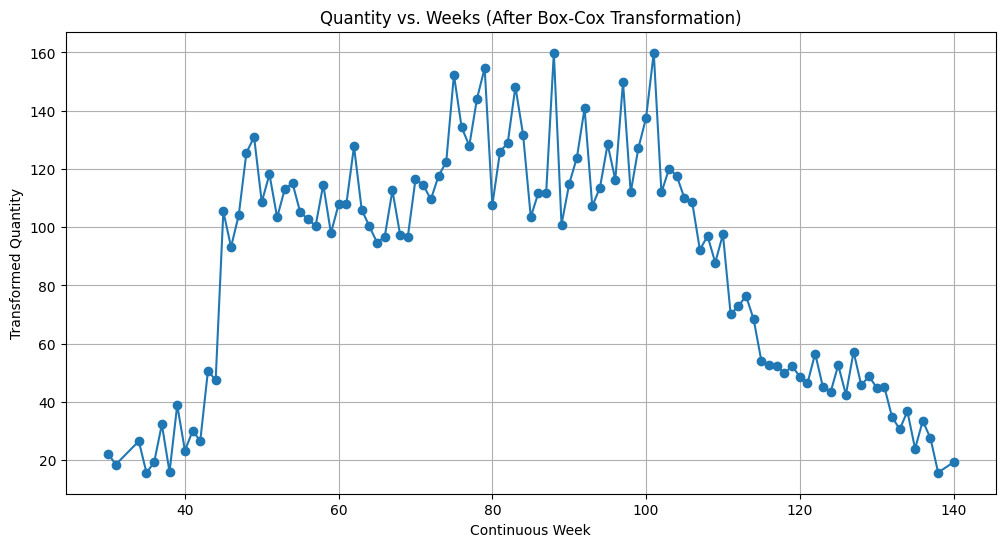

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1. Convert 'collect_scheduled_date' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Extract year and week
df['year'] = df['timestamp'].dt.year
df['week'] = df['timestamp'].dt.isocalendar().week

# 3. Create a continuous week index
df['continuous_week'] = (df['year'] - df['year'].min()) * 52 + df['week']

# 4. Group by continuous week and sum quantity
weekly_quantity = df.groupby('continuous_week')['quantity'].sum().reset_index()

# 5. Apply Box-Cox transformation to 'quantity'
weekly_quantity['quantity_boxcox'], lambda_value = stats.boxcox(weekly_quantity['quantity'])

# 6. Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(weekly_quantity['continuous_week'], weekly_quantity['quantity_boxcox'], marker='o')  # Use transformed data
plt.title('Quantity vs. Weeks (After Box-Cox Transformation)')
plt.xlabel('Continuous Week')
plt.ylabel('Transformed Quantity')
plt.grid(True)
plt.show()

In [ ]:
# Creating Lagged Features and Determining Optimal Lags
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

time_series = df.groupby('time_index')['quantity'].sum()
# Create lagged features:

# Ensure time_index is a datetime column
df['time_index'] = pd.to_datetime(df['timestamp'])

time_series = df.groupby('time_index')['quantity'].sum()  # Replace 'quantity' with your target variable column
time_series = time_series.to_frame()  #Target

# Create lagged features using pandas shift()
time_series['lag_7'] = time_series['quantity'].shift(7)
time_series['lag_14'] = time_series['quantity'].shift(14)
time_series['lag_30'] = time_series['quantity'].shift(30)
time_series = time_series.dropna()

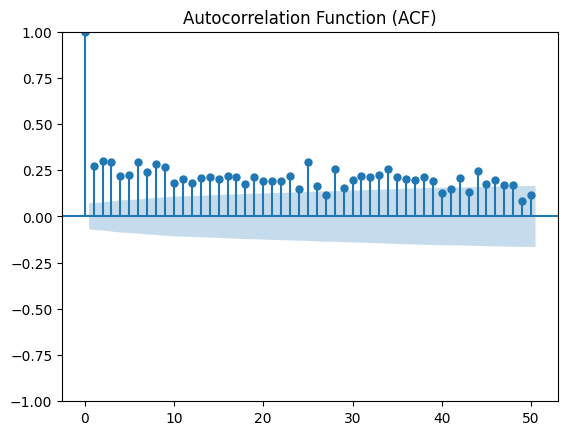

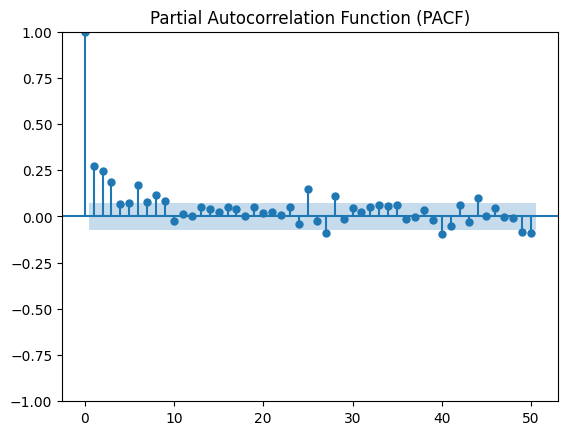

In [ ]:
#Plot ACF and PACF to determine optimal lags:
# Plot ACF
plot_acf(time_series['quantity'], lags=50)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(time_series['quantity'], lags=50)  # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

<ipython-input-349-0f087d5af0a7>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series['rolling_std_boxcox'] = time_series['rolling_std_boxcox'].fillna(method='bfill')
<ipython-input-349-0f087d5af0a7>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series['rolling_std_original'] = time_series['rolling_std_original'].fillna(method='bfill')


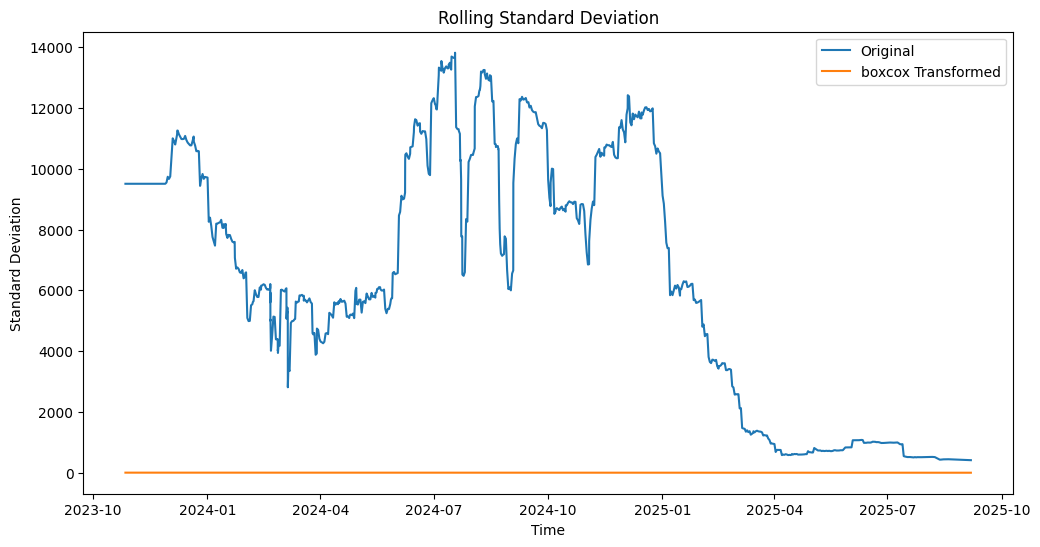

In [ ]:
#Calculate and plot rolling standard deviation:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate rolling standard deviation

time_series['rolling_std_original'] = time_series['quantity'].rolling(window=30).std()

# Apply Box-Cox transformation to 'quantity' column in time_series DataFrame

time_series['quantity_boxcox'], lambda_value = stats.boxcox(time_series['quantity']) # Apply Box-Cox to 'quantity' column
time_series['rolling_std_boxcox'] = time_series['quantity_boxcox'].rolling(window=30).std()
# Impute by using "ffill"
time_series['rolling_std_boxcox'] = time_series['rolling_std_boxcox'].fillna(method='bfill')
time_series['rolling_std_original'] = time_series['rolling_std_original'].fillna(method='bfill')
# Plot the rolling standard deviation

plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series['rolling_std_original'], label='Original')
plt.plot(time_series.index, time_series['rolling_std_boxcox'], label='boxcox Transformed')
plt.title('Rolling Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

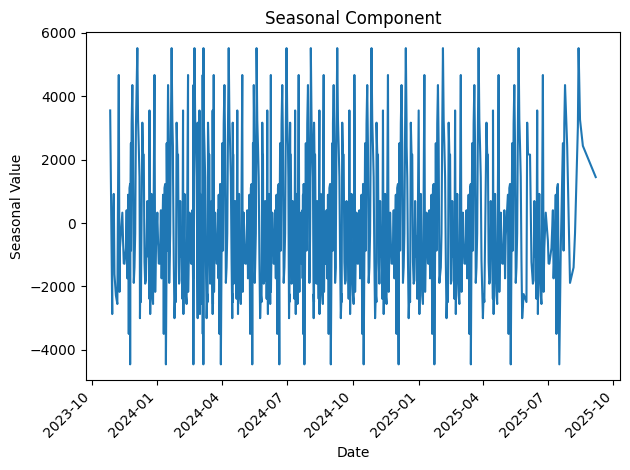

In [ ]:
# Incorporates seasonality for time series with recurring patterns(SARIMA).
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Select only the relevant column for decomposition (e.g., 'quantity')
decomposition_series = time_series['quantity']  # the column to decompose

# Perform seasonal decomposition
result = seasonal_decompose(decomposition_series, model='additive', period=52)

# Access the seasonal component
seasonal_values = result.seasonal

# Convert the index of seasonal_values to datetime objects
seasonal_values.index = pd.to_datetime(seasonal_values.index)

# Plot the seasonal component
plt.plot(seasonal_values.index, seasonal_values.values)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df['timestamp'].isnull().sum()
df['quantity'].isnull().sum()
df.isnull().sum()

,0
client_list,0
timestamp,0
quantity,0
datetime_from,0
datetime_to,0
hamper_type,0
pickup_date,0
pickup_location,0
related_scheduler,0
unique_client,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
# ... (import other necessary libraries) ...

# 1. Load and preprocess data
# ... (data loading and preprocessing steps) ...

# 2. Feature Engineering
# ... (create lagged features, rolling statistics, time-based features, etc.) ...

# eg Lagged features
time_series['lag_7'] = time_series['quantity'].shift(7)
time_series['lag_14'] = time_series['quantity'].shift(14)
time_series['lag_30'] = time_series['quantity'].shift(30)
time_series = time_series.dropna()  # Drop rows with NaN values

# 3. Data Splitting (Time Series Cross-Validation)
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(time_series.index):
    X_train, X_test = time_series.iloc[train_index], time_series.iloc[test_index]
    y_train, y_test = X_train['quantity'], X_test['quantity']

    # 4. Feature Scaling (Optional, but can be beneficial)
    #  Standard scaling for lagged features
    # features_to_scale = ['lag_7', 'lag_14', 'lag_30']  # Select features to scale
    # scaler = StandardScaler()
    # X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
    # X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

    # 5. Model Selection and Hyperparameter Tuning
    #  Random Forest with Grid Search
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        # ... add other hyperparameters ...
    }
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                               param_grid, scoring='neg_mean_squared_error', cv=3) # Inner CV for hyperparameter tuning
    grid_search.fit(X_train[['lag_7', 'lag_14', 'lag_30']], y_train)  # Fit using selected features
    best_model = grid_search.best_estimator_

    # 6. Model Evaluation
    predictions = best_model.predict(X_test[['lag_7', 'lag_14', 'lag_30']])  # Predict using selected features
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"Fold RMSE: {rmse}")

# ... (further analysis and visualization) ...

Fold RMSE: 440.3831721732034
Fold RMSE: 701.4174395227615
Fold RMSE: 872.039341327106
Fold RMSE: 541.119063789716
Fold RMSE: 421.5567989508254


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Data prepared in X_train, y_train, X_test, y_test
# # 1. Split data chronologically (use the last 90 days as test set)
# Use the last 3 months for testing
train_data = time_series[:-90]
test_data = time_series[-90:]

# 2. Create TimeSeriesSplit object
n_splits = 5  # Number of cross-validation splits
tscv = TimeSeriesSplit(n_splits=n_splits)


# 1. Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # Specify objective for regression

# 2. Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevents overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node of the tree

}

# 3. Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # Adjust n_splits as needed

# 4. Perform Grid Search with TimeSeriesSplit
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use appropriate scoring metric
    cv=tscv,  # Use TimeSeriesSplit for time series data
    verbose=2  # Display progress during grid search
)

# 5. Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# 6. Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# 7. Make predictions on the test set
y_pred = best_model.predict(X_test)

# 8. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE

print("Best Hyperparameters:", best_params)
print("RMSE:", rmse)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, m

Last Days Actual Values (y_test):
time_index
2025-07-15 03:00:00    313.0
2025-07-22 03:00:00    654.0
2025-08-08 03:00:00    670.0
Name: quantity, dtype: float64

Last Days Predictions (predictions_xgb):
[293.88666 619.6798  675.3843 ]


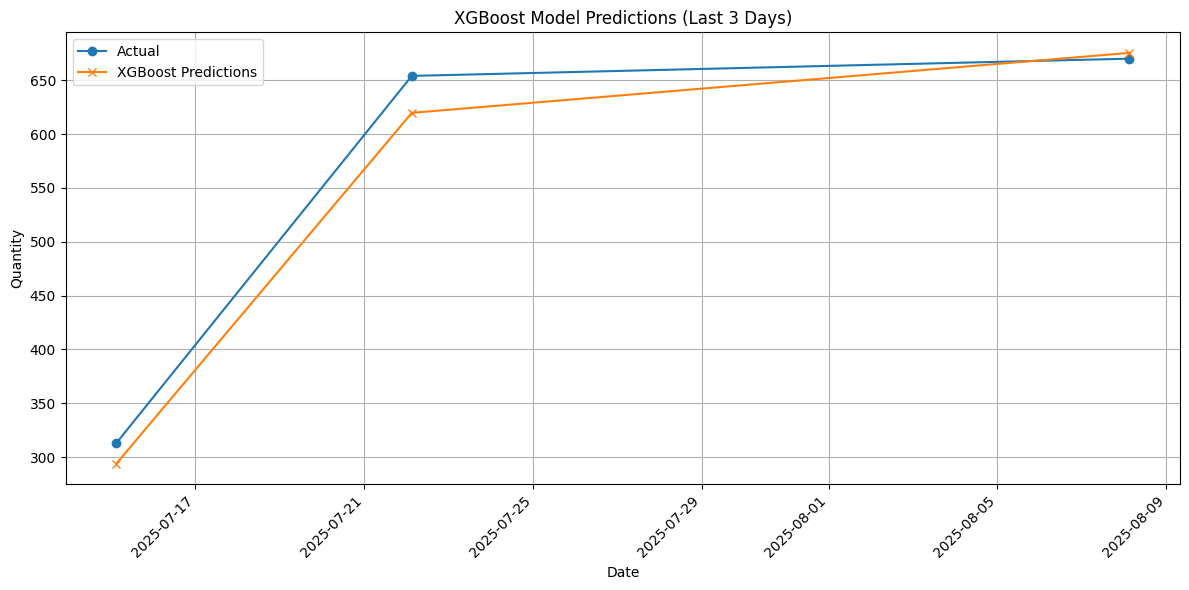

In [ ]:
# 9. Plot results
import matplotlib.pyplot as plt

# Assuming 'y_test' is a pandas Series with a DatetimeIndex
# and 'predictions_xgb' contains the XGBoost predictions

# Check the length of y_test and adjust the tail accordingly
tail_size = min(len(y_test), 9)  # Get the minimum between 9 and the length of y_test

# Select the last 'tail_size' days of data for plotting
last_days_actual = y_test.tail(tail_size)
last_days_predictions = predictions_xgb[-tail_size:]  # Adjust to the correct size

# Print the values before plotting
print("Last Days Actual Values (y_test):")
print(last_days_actual)
print("\nLast Days Predictions (predictions_xgb):")
print(last_days_predictions)

plt.figure(figsize=(12, 6))

# Plot the actual values
plt.plot(last_days_actual.index, last_days_actual.values, label='Actual', marker='o')

# Plot the predicted values
plt.plot(last_days_actual.index, last_days_predictions, label='XGBoost Predictions', marker='x')

plt.legend()  # Display the legend
plt.title(f'XGBoost Model Predictions (Last {tail_size} Days)')  # Update title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
#Model Selection & Training (data spliting)

from sklearn.model_selection import TimeSeriesSplit

# # 1. Split data chronologically (use the last 90 days as test set)
# use the last 3 months for testing
train_data = time_series[:-90]
test_data = time_series[-90:]

# 2. Create TimeSeriesSplit object
n_splits = 5  # Number of cross-validation splits
tscv = TimeSeriesSplit(n_splits=n_splits)

# 3. Iterate through the splits and train models
for train_index, test_index in tscv.split(train_data.index): # Split based on the index
    X_train, X_test = train_data.iloc[train_index], train_data.iloc[test_index]

    # y_train, y_test
    y_train, y_test = X_train['quantity'], X_test['quantity'] #  'quantity' is target variable


In [ ]:
import numpy as np

# Find rows with NaN values in y_train
nan_rows = y_train[y_train.isnull()].index

# Print the index values of rows with NaN
print("Rows with NaN values in y_train:")
print(nan_rows)

# If you want to see the actual data in those rows, you can use:
print(X_train.loc[nan_rows]) # Assuming X_train is your features DataFrame

# Impute by using "ffill"
y_train = y_train.fillna(method='ffill')


In [ ]:
# Normalization or Scaling
"""1.Tree-based models like XGBoost and Random Forest do not require feature scaling.
   2. Do not need to scale features for ARIMA/SARIMA models for these models focus on the temporal relationships within the time series data itself.
   3. Use Box-Cox transformation if data exhibits significant skewness or non-stationarity.
   4. Scale features after splitting to prevent information leakage between train and test sets.
"""
# If scaling in necessary,do to ladgged features
from sklearn.preprocessing import StandardScaler

#features_to_scale = ['lag_7', 'lag_14', 'lag_30']
#scaler = StandardScaler()
#time_series[features_to_scale] = scaler.fit_transform(time_series[features_to_scale])



In [ ]:
# Model Selection
""" 1. Statistical Models:
            a). ARIMA (Autoregressive Integrated Moving Average)- captures autocorrelations and trends.
            b). SARIMA (Seasonal ARIMA)-incorporates seasonality,
    2. Machine Learning Models:
            a). Random Forest-for robustness.
            b). XGBoost (Extreme Gradient Boosting).for its high accuracy and efficiency.
            c). Prophet-Time series forecasting with seasonality and trend changes.
            d). Neural Networks (LSTM, RNNs)-capable of learning complex patterns in sequential data
            e). LSTMs and RNNs - well-suited for time series.
"""
#1. Install and Import Necessary Libraries
!pip install statsmodels --upgrade
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#4. Fit the ARIMA model

time_series = time_series.asfreq('D')  # Resample to daily frequency

model = ARIMA(time_series['quantity'], order=(2, 1, 1))
model_fit = model.fit()

#5. Make Predictions

predictions = model_fit.predict(start=len(time_series), end=len(time_series) + 8)  # Forecast 9 steps ahead (0 to 8)
print(predictions)

2025-09-07 03:00:00    531.605357
2025-09-08 03:00:00    551.732761
2025-09-09 03:00:00    556.188516
2025-09-10 03:00:00    557.172938
2025-09-11 03:00:00    557.390410
2025-09-12 03:00:00    557.438452
2025-09-13 03:00:00    557.449065
2025-09-14 03:00:00    557.451410
2025-09-15 03:00:00    557.451928
Freq: D, Name: predicted_mean, dtype: float64


RMSE: 7120.008289228384


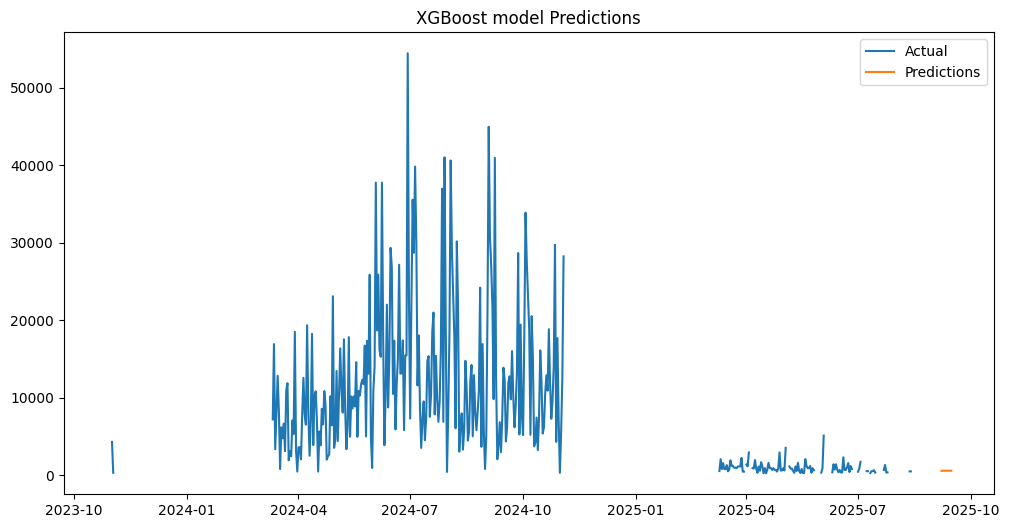

In [ ]:
# Deliverables and Evaluation
""" 1. Visualization: Create plots to visualize the actual vs. predicted values.
    2. Metrics: RMSE,MAE
    3. Comparison:Compare the performance of all models based on the chosen metrics.
"""

#6. Evaluate the Model
from sklearn.metrics import mean_squared_error

# Calculate RMSE

valid_indices = time_series['quantity'].notna() & model_fit.fittedvalues.notna()
# The 'squared' parameter was introduced in scikit-learn 0.22

mse = mean_squared_error(time_series.loc[valid_indices, 'quantity'],
                          model_fit.fittedvalues[valid_indices])
rmse = np.sqrt(mse)  # Calculate RMSE from MSE

print('RMSE:', rmse)


#7. Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(time_series['quantity'], label='Actual')
plt.plot(predictions, label='Predictions')  # Assuming 'predictions' is already defined
plt.legend()
plt.title('XGBoost model Predictions')
plt.show()

Client table: unique id
hamper table; unique client

In [ ]:
# calculate MAE and MAPE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Calculate MAE
mae = mean_absolute_error(time_series.loc[valid_indices, 'quantity'],
                          model_fit.fittedvalues[valid_indices])
print('MAE:', mae)

# Calculate MAPE
mape = mean_absolute_percentage_error(time_series.loc[valid_indices, 'quantity'],
                                     model_fit.fittedvalues[valid_indices])
print('MAPE:', mape)


MAE: 4493.856610985973
MAPE: 1.3186687095513034


In [ ]:
#  Model Optimization & Hyperparameter Tuning
import itertools
from sklearn.metrics import mean_squared_error

# Define search space
p_values = [0, 1, 2]
d_values = [0, 1, 2]
q_values = [0, 1, 2]

# Create a list of all possible combinations
